In [1]:
cd ..

C:\Users\Sommer Lab\Documents\Analysis Code


In [2]:
from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import pandas as pd
import os
from scipy import constants
import pickle

In [3]:
from scipy.optimize import curve_fit


In [4]:
Folders = [
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\15 May 2024\Andor\ODT 400 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\15 May 2024\Andor\ODT 1150 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\15 May 2024\Andor\ODT 1900 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\15 May 2024\Andor\ODT 2650 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\15 May 2024\Andor\ODT 3400 Modulation 0.1 V 10-50 kHz Variable tmod_1',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\16 May 2024\Andor\ODT 4150 Modulation 0.1 V 10-50 kHz Variable tmod'
]
    

In [120]:
Folders = [
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\20 May 2024\Andor\ODT 3400 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\20 May 2024\Andor\ODT 4150 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\20 May 2024\Andor\ODT 2650 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\20 May 2024\Andor\ODT 1900 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\20 May 2024\Andor\ODT 1150 Modulation 0.1 V 10-50 kHz Variable tmod',
    r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\05-2024\20 May 2024\Andor\ODT 400 Modulation 0.1 V 10-50 kHz Variable tmod',
]
    

In [121]:
dfs = []

for ff in Folders:
    with open(os.path.join(ff, 'Results.pkl'), 'rb') as f:
        dfs.append( pickle.load(f) )

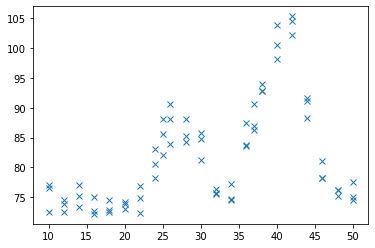

In [122]:
plt.plot( dfs[1].fmod_kHz, dfs[1].Ywidth, 'x' )

In [123]:
pp, std, _ = ImageAnalysisCode.fitMultiGaussian( dfs[1].Ywidth, xdata=dfs[1].fmod_kHz, guess=[ 15, 110, 25, 37, 3, 4, 70] )

In [124]:
pp

array([13.75987288, 30.29001048, 27.16779478, 40.78447586,  3.        ,
        3.03381694, 73.66035187])

In [125]:
std

array([1.01603518, 1.06596923, 0.22800233, 0.10405217, 0.28276542,
       0.12160844, 0.5139089 ])

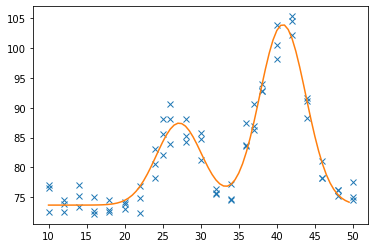

In [126]:
xx = np.arange(10, 50, 0.5)
plt.plot( dfs[1].fmod_kHz, dfs[1].Ywidth, 'x' )
plt.plot( xx, ImageAnalysisCode.MultiGaussian(xx, *pp) )

In [127]:
params = ImageAnalysisCode.ExperimentParams('5/17/2024', t_exp = 10e-6, picturesPerIteration=None, cam_type = "zyla")
dxMicron = params.camera.pixelsize_microns/params.magnification   #The length in micron that 1 pixel correspond to. 

In [128]:
dfs[0].ODT_Position[0]

3400.0

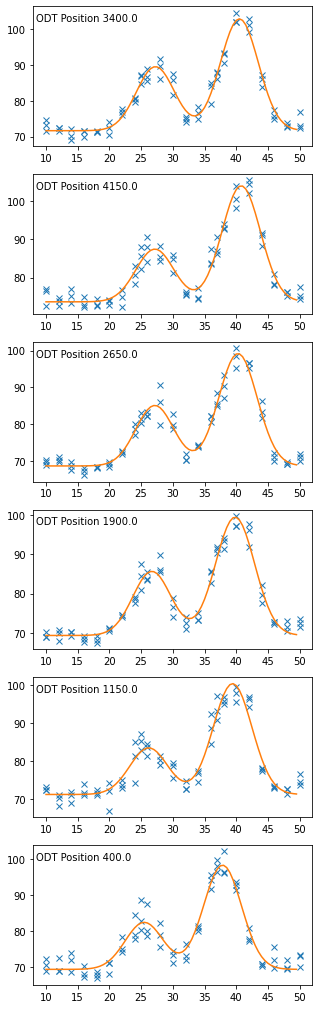

In [129]:
L = len(dfs)
fig, axes = plt.subplots( L, 1, figsize=[5, 3*L] )
frequency = []
ODT_Position = []
std = []

for ii, ax in enumerate(axes):
    pp, ss, _ = ImageAnalysisCode.fitMultiGaussian( dfs[ii].Ywidth, xdata=dfs[ii].fmod_kHz, guess=[ 15, 110, 25, 37, 3, 4, 70] )
    frequency.append(pp[2:4])
    std.append(ss[2:4])
    ODT_Position.append( dfs[ii].ODT_Position[0] )
    
    ax.plot( dfs[ii].fmod_kHz, dfs[ii].Ywidth, 'x' )
    ax.plot( xx, ImageAnalysisCode.MultiGaussian(xx, *pp) )
    
    ax.text(0.01, 0.95, 
            'ODT Position {}'.format(dfs[ii].ODT_Position[0]),
            # fontsize=5*fontSizeRate, 
            ha='left', va='top', 
            transform=ax.transAxes)
frequency = np.array(frequency)
std = np.array(std)


In [130]:
frequency

array([[27.25853951, 40.49871558],
       [27.16779478, 40.78447586],
       [27.16004546, 40.28056829],
       [26.69650798, 39.82035755],
       [26.20228435, 39.42528366],
       [25.48392903, 37.84542931]])

In [131]:
[ii[1]/ii[0] for ii in frequency]

[1.4857258056177962,
 1.501206711577368,
 1.483081769728646,
 1.4915942405118359,
 1.5046506299771858,
 1.4850704246798334]

In [132]:
frequency[:,1]/frequency[:,0]

array([1.48572581, 1.50120671, 1.48308177, 1.49159424, 1.50465063,
       1.48507042])

In [133]:
std

array([[0.15099973, 0.08598383],
       [0.22800233, 0.10405217],
       [0.17745227, 0.09467403],
       [0.18671917, 0.09866311],
       [0.3172273 , 0.12664144],
       [0.30749329, 0.13719836]])

[Text(0.5, 0, 'Vertical Position (µm)'), Text(0, 0.5, 'Frequency (kHz)')]

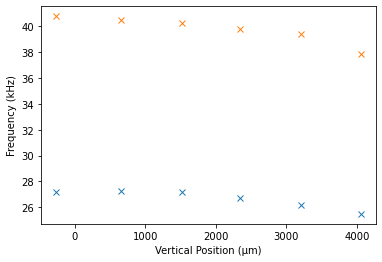

In [134]:
fig, ax = plt.subplots(1,1)
ax.plot( y[ODT_Position], frequency, 'x')
ax.set( xlabel='Vertical Position (µm)', ylabel='Frequency (kHz)' )

[Text(0.5, 0, 'Vertical Position (µm)'), Text(0, 0.5, 'Third Frequency (kHz)')]

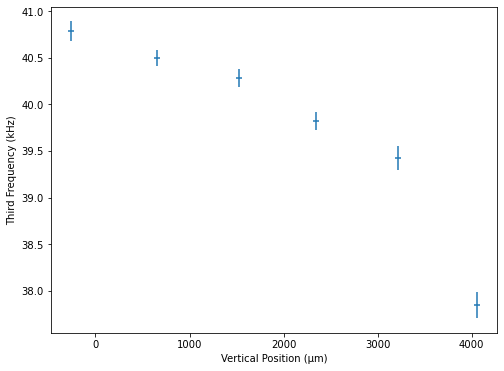

In [136]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar( y[ODT_Position], frequency[:,1] , std[:,1], ls='none')
ax.scatter( y[ODT_Position], frequency[:,1], marker='_')

# ax.errorbar( y[ODT_Position], frequency[:,0] , std[:,0], ls='none')
# ax.scatter( y[ODT_Position], frequency[:,0], marker='_')

ax.set( xlabel='Vertical Position (µm)', ylabel='Third Frequency (kHz)' )



[Text(0.5, 0, 'Vertical Position (µm)'),
 Text(0, 0.5, 'Second Frequency (kHz)')]

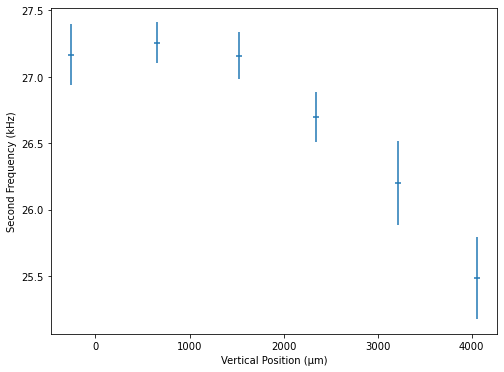

In [135]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
# ax.errorbar( y[ODT_Position], frequency[:,1] , std[:,1], ls='none')
# ax.scatter( y[ODT_Position], frequency[:,1], marker='_')

ax.errorbar( y[ODT_Position], frequency[:,0] , std[:,0], ls='none')
ax.scatter( y[ODT_Position], frequency[:,0], marker='_')

ax.set( xlabel='Vertical Position (µm)', ylabel='Second Frequency (kHz)' )



In [30]:
dfYcenter = []
dfYcenter.append( pd.read_csv(r'F:\Self-Alinging ODT\ycenter1.csv' ) )
dfYcenter.append( pd.read_csv(r'F:\Self-Alinging ODT\ycenter2.csv' ) )

dfYcenter = pd.concat(dfYcenter)

In [31]:
dfmean = dfYcenter.groupby('ODT_Position').mean()
x = dfmean.index
y = dfmean.Ycenter

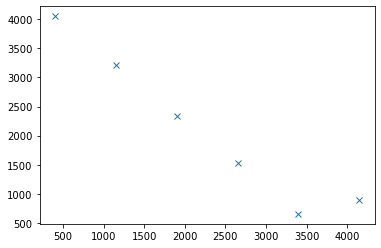

In [32]:
plt.plot(y, 'x')

In [33]:
y.iloc[-1] -= 300 * dxMicron

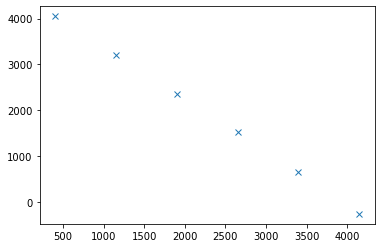

In [34]:
plt.plot(y, 'x')

In [79]:
ODT_Position[-1] = 400

In [54]:
y[ODT_Position]

ODT_Position
3400.0     653.156721
4150.0    -261.198560
2650.0    1520.957065
1900.0    2344.664578
1150.0    3211.098770
400.0     4051.820620
Name: Ycenter, dtype: float64

In [35]:
y

ODT_Position
400.0     4051.820620
1150.0    3211.098770
1900.0    2344.664578
2650.0    1520.957065
3400.0     653.156721
4150.0    -261.198560
Name: Ycenter, dtype: float64

In [93]:
dfmean[['Ycenter']].to_csv('ycenter.csv')

In [92]:
pwd

'C:\\Users\\Sommer Lab\\Documents\\Analysis Code'